In [30]:
# ! pip install pandas
# ! pip install calender
# ! pip install numpy
# ! pip install datetime
# ! pip install matplotlib
# ! pip install collections
# ! pip install random
# ! pip install tqdm
# ! pip install sklearn
# ! pip install lightgbm
# ! pip install xgboost
# ! pip install seaborn


# from IPython.display import clear_output as cclear
# cclear()

In [31]:
import pandas as pd
import calendar
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from IPython.display import clear_output as cclear
from lightgbm import LGBMRegressor
import joblib
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [32]:
def reorder_data(df, csv_name):
    df['sp_index'] = (df.index)
    index_dict = dict(zip(df.id, df.sp_index))
    df = df.drop('sp_index', axis=1)

    kk = pd.read_csv(str(csv_name)+'.csv')
    kk = kk.drop(kk.columns[0], axis=1)

    kk['sp_index'] = kk["id"].map(index_dict)
    kk = kk.sort_values(by='sp_index', axis=0)
    kk = kk.drop('sp_index', axis=1)
    kk.to_csv(str(csv_name)+'.csv')
    
def get_output_of_eval_or_val(df):
    main_out_df = pd.DataFrame()
    
    list_dept = list(set(df.dept_id))
    for i in list_dept:
        print('Sequence of depts processing: ', list_dept)
        print('Working on Dept: ', i)
        
        le, X_test, train_out = startegy7dot1(df, i)
        
        print('Reversing the long form...')
        out_df = reverse_long_form(le, X_test, train_out)
        main_out_df = pd.concat([main_out_df, out_df], ignore_index=False)
        cclear()

    l = []                                                       # In this part we rename the columns to F_1, F_2 ....
    for i in range(1,29):
        l.append('F'+str(i))
    l = ['id']+l

    main_out_df.columns = l
    
    return main_out_df

# Load data

In [34]:
def get_csv(X):
    return pd.read_csv(path+X)

path = '/content/drive/My Drive/Runner/Walmart_Project/'
path = ''
calender, sales_train_ev, sales_train_val, sell_prices = get_csv('calendar.csv'), get_csv('sales_train_evaluation.csv'), \
                                                         get_csv('sales_train_validation.csv'), get_csv('sell_prices.csv')

In [35]:
sales_train_ev

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [36]:
ndf = pd.DataFrame(columns=['d_'+str(i) for i in range(1942, 1970)])
sales_train_ev = pd.concat([sales_train_ev, ndf], axis=1)
sales_train_ev

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
(1969-30)-(30*12), (1969-30)+1

(1579, 1940)

In [38]:
train = pd.concat([sales_train_ev.iloc[:,:6], sales_train_ev.iloc[:,((1969-28)-(30*12))+5:(1969-28)+5+1]], axis=1)
train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1581,d_1582,d_1583,d_1584,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,2,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,2,1,0,13,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,2,1,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,0,1,1,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1,1,1,0,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [39]:
val = pd.concat([sales_train_ev.iloc[:,:6], sales_train_ev.iloc[:,(1969-28)+5+1:]], axis=1)
val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1942,d_1943,d_1944,d_1945,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [41]:
ndf = pd.DataFrame(columns=['d_'+str(i) for i in range(1914, 1942)])
sales_train_val = pd.concat([sales_train_val, ndf], axis=1)

In [42]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
test_tr = pd.concat([sales_train_val.iloc[:,:6], sales_train_val.iloc[:,((1947-30)-(30*12)):(1947-28)]], axis=1)
test_tr

,id,item_id,dept_id,cat_id,store_id,state_id,d_1552,d_1553,d_1554,d_1555,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,1,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,1,0,1,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,2,1,6,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,2,0,2,3,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1,1,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [44]:
test_val = pd.concat([sales_train_val.iloc[:,:6], sales_train_val.iloc[:,(1947-28):]], axis=1)
test_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1914,d_1915,d_1916,d_1917,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
sell_prices['new_col'] = sell_prices['item_id'] + '_' + sell_prices['store_id'] + '_' + sell_prices['wm_yr_wk'].astype(str)

In [46]:
min(sell_prices.sell_price), np.mean(sell_prices.sell_price), np.median(sell_prices.sell_price), max(sell_prices.sell_price)

(0.01, 4.410952389235621, 3.47, 107.32)

In [47]:
calender['wm_yr_wk'] = calender.wm_yr_wk.astype(str)

In [48]:
non_numeric_col_list = ['id','item_id','dept_id','cat_id','store_id','state_id','d', 'date']
store_dict = {'CA_1':0, 'CA_2':0, 'CA_3':0, 'CA_4':0, 'WI_1':0, 'WI_2':0, 'WI_3':0, 'TX_1':0, 'TX_2':0, 'TX_3':0}

In [49]:
# Encoding Categorical Columns
def encode_cat_cols(new_df):
    le = [0]*len(non_numeric_col_list)             
    for i in range(len(non_numeric_col_list)):
        print("Encoding col: ", non_numeric_col_list[i])
        le[i] = LabelEncoder()
        new_df[non_numeric_col_list[i]] = le[i].fit_transform( new_df[non_numeric_col_list[i]] )
    return le, new_df


# Function for reversing the long form
def reverse_long_form(le, X_test, train_out):
    for i in range(len(non_numeric_col_list)):
        X_test[non_numeric_col_list[i]] = le[i].inverse_transform(X_test[non_numeric_col_list[i]])

    X_test['unit_sale'] = train_out
    kk = X_test.pivot(index='id', columns='d')['unit_sale']
    kk['id'] = kk.index
    kk.reset_index(drop=True, inplace=True)

    cols = list(kk)
    cols = [cols[-1]] + cols[:-1]
    kk = kk[cols]

    return kk


# This function does feature engineering on sales_train_ev or sales_train_val
# There is another feature engineering function for adding columns to dataframe containing rows of only onw store
def feature_engineer(df):
    day_columns = list(df.columns[6:])
    other_var = list(df.columns[:6])
    
    print('Melting out...')
    df = pd.melt(df, id_vars = other_var, value_vars = day_columns)
    df = df.rename(columns = {"variable": "d", "value": "unit_sale"})
    # print(df.shape)
    
    print('Adding Feature \'date\'...')
    cal_dict = dict(zip(calender.d,calender.date))
    df["date"] = df["d"].map(cal_dict)
    # df.head()

    print('Adding Feature \'wrwmwk\'...')
    cal_dict = dict(zip(calender.d,calender.wm_yr_wk))
    df["wm_yr_wk"] = df["d"].map(cal_dict)
    
    print('Adding Feature \'day_of_week\'...')
    day_of_week_dict = dict(zip(calender.d,calender.wday))
    df['day_of_week'] = df["d"].map(day_of_week_dict)

    print('Adding Feature \'month_no\'...')
    month_no_dict = dict(zip(calender.d,calender.month))
    df['month_no'] = df["d"].map(month_no_dict)
    
    print('Adding Feature \'day_of_month\'...')
    l = [int(i[-2:]) for i in list(calender.date)]
    calender['day_of_month'] = l
    
    day_of_month_dict = dict(zip(calender.d,calender.day_of_month))
    df['day_of_month'] = df["d"].map(day_of_month_dict)
    
    print('Done.')
    print('Here is how featurised data looks like...')
    print(df.head(3))
    return df


def reorder_data(df, csv_name):
    df['sp_index'] = (df.index)
    index_dict = dict(zip(df.id, df.sp_index))
    df = df.drop('sp_index', axis=1)

    kk = pd.read_csv(str(csv_name)+'.csv')
    kk = kk.drop(kk.columns[0], axis=1)

    kk['sp_index'] = kk["id"].map(index_dict)
    kk = kk.sort_values(by='sp_index', axis=0)
    kk = kk.drop('sp_index', axis=1)
    kk.to_csv(str(csv_name)+'.csv')
    
def get_output_of_eval_or_val(df):
    main_out_df = pd.DataFrame()
    
    list_dept = list(set(df.dept_id))
    for i in list_dept:
        print('Sequence of depts processing: ', list_dept)
        print('Working on Dept: ', i)
        
        le, X_test, train_out = startegy7dot1(df, i)
        
        print('Reversing the long form...')
        out_df = reverse_long_form(le, X_test, train_out)
        main_out_df = pd.concat([main_out_df, out_df], ignore_index=False)
        cclear()

    l = []                                                       # In this part we rename the columns to F_1, F_2 ....
    for i in range(1,29):
        l.append('F'+str(i))
    l = ['id']+l

    main_out_df.columns = l
    
    return main_out_df

In [50]:
date_le = preprocessing.LabelEncoder()
date_le = date_le.fit(calender.date)

wm_le = preprocessing.LabelEncoder()
wm_le = wm_le.fit(calender.wm_yr_wk)

d_le = preprocessing.LabelEncoder()
d_le = d_le.fit(calender.d)

item_le = preprocessing.LabelEncoder()
item_le = item_le.fit(sales_train_ev['item_id'])

dept_le = preprocessing.LabelEncoder()
dept_le = dept_le.fit(sales_train_ev['dept_id'])

cat_le = preprocessing.LabelEncoder()
cat_le = cat_le.fit(sales_train_ev['cat_id'])

store_le = preprocessing.LabelEncoder()
store_le = store_le.fit(sales_train_ev['store_id'])

state_le = preprocessing.LabelEncoder()
state_le = state_le.fit(sales_train_ev['state_id'])

In [51]:
def prep_data(train):
    
    df = train
    empty_list = [0]*30490
    for i in range(1942, 1970):
        df['d_'+str(i)] = empty_list
    df = feature_engineer(df)
    
    my_df = pd.DataFrame(columns=['nid'])
    my_df['nid'] = df['id'].apply(lambda x:x[:-10])
    df['new_id'] = my_df['nid']+df['wm_yr_wk'].astype(str)
    
    sell_dict = dict(zip(sell_prices.new_col,sell_prices.sell_price))

    my_df = pd.DataFrame(columns=['new_id'])
    my_df['new_id'] = df["new_id"]

    my_df['price'] = my_df['new_id'].map(sell_dict)
    my_df['price'].fillna(np.median(sell_prices.sell_price), inplace = True)
    df["price"] = my_df['price']
    
    return df

def my_label(col, ndf):
    le = preprocessing.LabelEncoder()
    le = le.fit(ndf[col])
    ndf[col] = le.transform(ndf[col])
    return le, ndf

def pick_dept_data(dept_id, tdf):
    
    ndf = tdf[tdf.dept_id == dept_id]
    ndf.drop(['new_id'], axis=1, inplace=True)
    
    ndf['wm_yr_wk'] = ndf.wm_yr_wk.astype(str)
    
    ndf['date'] = date_le.transform(ndf.date)
    ndf['wm_yr_wk'] = wm_le.transform(ndf.wm_yr_wk)
    ndf['d'] = d_le.transform(ndf.d)
    
    ndf['item_id'] = item_le.transform(ndf['item_id'])
    ndf['dept_id'] = dept_le.transform(ndf['dept_id'])
    ndf['cat_id'] = cat_le.transform(ndf['cat_id'])
    ndf['store_id'] = store_le.transform(ndf['store_id'])
    ndf['state_id'] = state_le.transform(ndf['state_id'])
    
    cclear()
    
    return ndf   

def scoring_fun(regr, X_train, y_train, X_val, y_val):
    
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_train)
    rms = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = (r2_score(y_train, y_pred))
    print(f'Train Errors: RMSE: {rms}, R Sq: {r2}')
    
    y_pred = regr.predict(X_val)
    rms = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = (r2_score(y_val, y_pred))
    print(f'Val Errors: RMSE: {rms}, R Sq: {r2}')
    
def print_score(model, train, val, y_train, y_val):
    
    y_pred = model.predict(train)
    rms1 = np.sqrt(mean_squared_error(y_train, y_pred))
    r2_1 = (r2_score(y_train, y_pred))
#     print(f'Train Errors: RMSE: {rms}, R Sq: {r2}')

    pred_on = val
    y_pred = model.predict(pred_on)
    rms2 = np.sqrt(mean_squared_error(y_val, y_pred))
    r2_2 = (r2_score(y_val, y_pred))
#     print(f'Val Errors: RMSE: {rms}, R Sq: {r2}')
    
    return rms1, rms2, r2_1, r2_2

def fit_fun(regr, X_train, y_train, X_val, y_val):
    
#     regr.fit(X_train, y_train)
#     y_pred = regr.predict(X_val)

    scoring_fun(regr, X_train, y_train, X_val, y_val)

    imp_df = pd.DataFrame({'features':X_train.columns, 'imp':regr.feature_importances_}).sort_values(
                            by=['imp'], ascending=False)

    plt.figure(figsize=(5,8))
    sns.barplot(x=imp_df.imp, y=imp_df.features)
    plt.xticks(rotation=90)
    plt.show()
    
def get_dept_train_val(train, val, dept_id):
    
    tdf = prep_data(train)
    ddf_t = pick_dept_data(dept_id, tdf)
    ddf_t.drop(['dept_id'], axis=1, inplace=True)
    
    vdf = prep_data(val)
    ddf_v = pick_dept_data(dept_id, vdf)
    ddf_v.drop(['dept_id'], axis=1, inplace=True)
    
    X_train, y_train, X_val, y_val = ddf_t.drop(['unit_sale'], axis=1), ddf_t.unit_sale, \
                                    ddf_v.drop(['unit_sale'], axis=1), ddf_v.unit_sale
    
    return X_train, y_train, X_val, y_val

## Tuning on 1 mon data

In [ ]:
X_train, y_train, X_val, y_val = get_dept_train_val(train, val, 'FOODS_3')
X_train.drop(['id'], axis=1, inplace=True)
X_val.drop(['id'], axis=1, inplace=True)

In [ ]:
%%time

params = {
    
      'boosting_type' : ['gbdt'],       
      'objective' : ['tweedie'],
      'tweedie_variance_power' : [1.3, 1.7],
#       'metric' : 'rmse',
      'subsample' : [0.5],
      'subsample_freq' : [1],
      'learning_rate' : [0.05],
#       'num_leaves' : [500, 1000, 2000],
#       'min_data_in_leaf' : [1000, 2000, 4000],
      'feature_fraction' : [0.5],
      'max_bin' : [100, 200],
      'n_estimators' : [100, 500, 1500],
      'boost_from_average' : [False]
        }

regr = LGBMRegressor()
regr = GridSearchCV(estimator=regr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2)

regr.fit(X_train, y_train)

print("Best parameters:", regr.best_params_)
print("Lowest RMSE: ", (-regr.best_score_)**(1/2.0))

In [ ]:
# Best parameters: {'boost_from_average': False, 
#                   'boosting_type': 'gbdt', 
#                   'feature_fraction': 0.5, 
#                   'learning_rate': 0.05, 
#                   'max_bin': 200, 
#                   'n_estimators': 1500, 
#                   'objective': 'tweedie', 
#                   'subsample': 0.5, 
#                   'subsample_freq': 1, 
#                   'tweedie_variance_power': 1.3}

In [ ]:
###########################

In [ ]:
X_train, y_train, X_val, y_val = get_dept_train_val(train, val, 'FOODS_3')
X_train.drop(['id'], axis=1, inplace=True)
X_val.drop(['id'], axis=1, inplace=True)

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 1000,              ############
#                           min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 1.3778693204873023, R Sq: 0.8939506032543485
# Val Errors: RMSE: 3.9322541027356466, R Sq: 0.14652971942285375
# Wall time: 5min 22s

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
Train Errors: RMSE: 1.35112377623424, R Sq: 0.8980276530783567
Val Errors: RMSE: 3.9112899975665227, R Sq: 0.15560570771029048


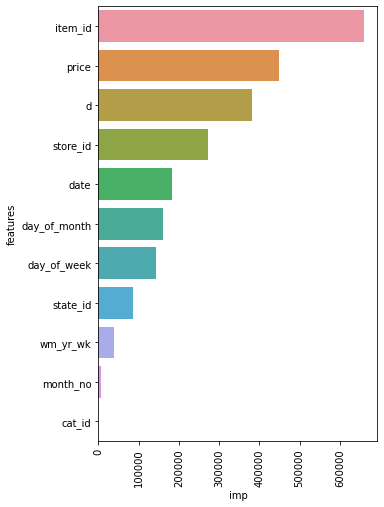

CPU times: user 38min 15s, sys: 18.6 s, total: 38min 33s
Wall time: 6min 51s


In [70]:
%%time #############################################################################
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.03,
                          num_leaves = 2000,              ############
#                           min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)
# Train Errors: RMSE: 1.2624432888986197, R Sq: 0.9109741973763595
# Val Errors: RMSE: 3.977589068468091, R Sq: 0.12673695667360396

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
#                           min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)
# Train Errors: RMSE: 1.1962638490081923, R Sq: 0.9200633214320022
# Val Errors: RMSE: 4.029425482882523, R Sq: 0.10382770911209893

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 1000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)
# Train Errors: RMSE: 2.0439459663050052, R Sq: 0.766637556762378
# Val Errors: RMSE: 3.9401354544779785, R Sq: 0.1431050982195089

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=2000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2000
Train Errors: RMSE: 2.3793723453316464, R Sq: 0.6837598836852274
Val Errors: RMSE: 3.8869752878613353, R Sq: 0.16607150571407903


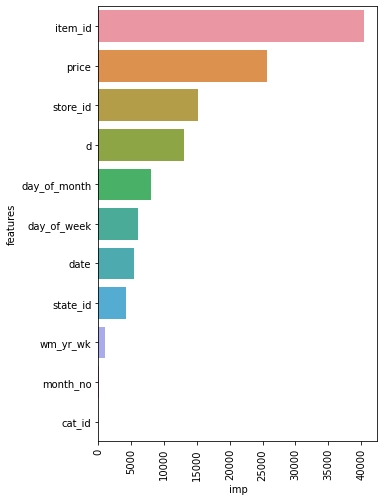

CPU times: user 9min 1s, sys: 1.45 s, total: 9min 3s
Wall time: 1min 31s


In [64]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.03,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 2000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)
# Train Errors: RMSE: 2.251113745766463, R Sq: 0.7169344473536894
# Val Errors: RMSE: 3.9524945360332477, R Sq: 0.13772099724941433

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
Train Errors: RMSE: 2.6705897146594544, R Sq: 0.6016117820868113
Val Errors: RMSE: 3.9569025129698296, R Sq: 0.13579663005191078


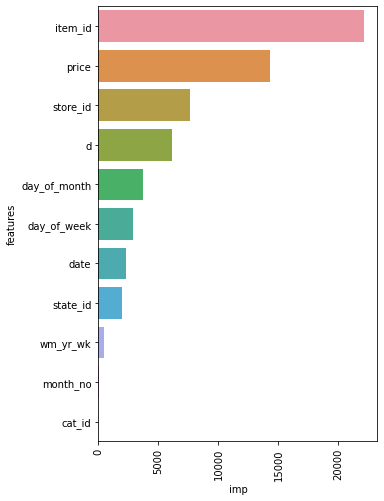

CPU times: user 7min 25s, sys: 1.05 s, total: 7min 26s
Wall time: 1min 15s


In [65]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.03,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 2.6705897146594544, R Sq: 0.6016117820868113
# Val Errors: RMSE: 3.9569025129698296, R Sq: 0.13579663005191078

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 500,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 1.8640967681167102, R Sq: 0.8058984297258709
# Val Errors: RMSE: 3.9597105426717216, R Sq: 0.13456962494652847

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 2000,              ############
                          min_data_in_leaf = 500,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 1.8640967681167102, R Sq: 0.8058984297258709
# Val Errors: RMSE: 3.9597105426717216, R Sq: 0.13456962494652847

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 500,              ############
                          min_data_in_leaf = 500,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 1.864096768115755, R Sq: 0.8058984297260698
# Val Errors: RMSE: 3.9596750091434982, R Sq: 0.1345851572216007

In [ ]:
%%time   ########################################################################
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1000,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 2.6514753209629247, R Sq: 0.6072941957515667
# Val Errors: RMSE: 3.943475042961918, R Sq: 0.14165190498191327

In [ ]:
%%time ###########################################################################
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)
# Train Errors: RMSE: 2.9258395110504996, R Sq: 0.5218180897159042
# Val Errors: RMSE: 3.9505930916559686, R Sq: 0.1385504385895483

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
Train Errors: RMSE: 3.725819341070007, R Sq: 0.22458226903098788
Val Errors: RMSE: 4.152682821248606, R Sq: 0.048162574526601554


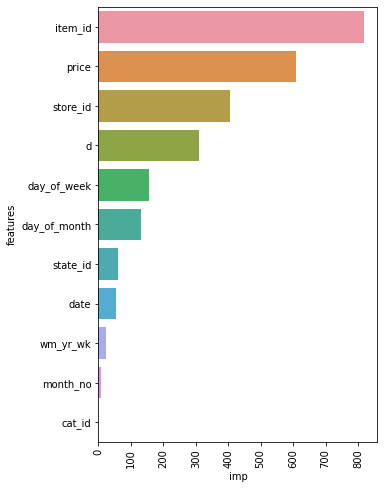

CPU times: user 15.9 s, sys: 268 ms, total: 16.2 s
Wall time: 3.3 s


In [66]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.03,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 100,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)
# Train Errors: RMSE: 3.725819341070007, R Sq: 0.22458226903098788
# Val Errors: RMSE: 4.152682821248606, R Sq: 0.048162574526601554

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
Train Errors: RMSE: 3.215021918023219, R Sq: 0.4226222844150831
Val Errors: RMSE: 4.029375211323408, R Sq: 0.10385007046234784


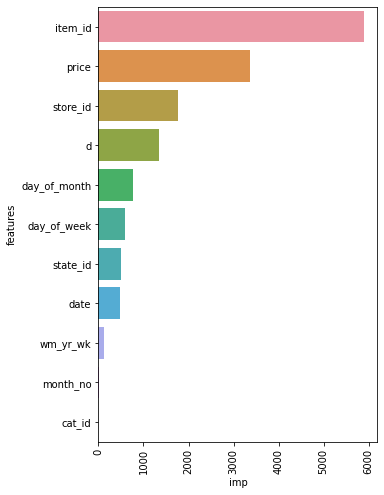

CPU times: user 2min 9s, sys: 479 ms, total: 2min 10s
Wall time: 22.6 s


In [67]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.03,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 3.215021918023219, R Sq: 0.4226222844150831
# Val Errors: RMSE: 4.029375211323408, R Sq: 0.10385007046234784

In [ ]:
%%time #######################################################################################
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 300,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 2.952813009176483, R Sq: 0.5129606704016394
# Val Errors: RMSE: 3.9612597684654456, R Sq: 0.13389229799192293

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 100,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)
# Train Errors: RMSE: 3.0712998684676514, R Sq: 0.4730898262575125
# Val Errors: RMSE: 3.9946450831298153, R Sq: 0.11923174646160573

In [ ]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.2,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 100,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 3.01003183779478, R Sq: 0.49390235044641606
# Val Errors: RMSE: 3.9556732645976695, R Sq: 0.13633349219212443

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
Train Errors: RMSE: 3.3414477163407197, R Sq: 0.3763204816473079
Val Errors: RMSE: 4.050580162208094, R Sq: 0.0943931118732555


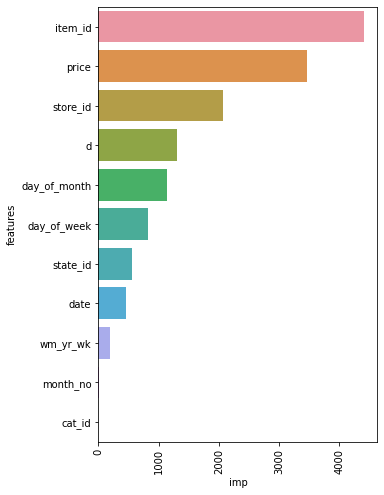

CPU times: user 2min 11s, sys: 409 ms, total: 2min 11s
Wall time: 22.9 s


In [68]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.2,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.03,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 50,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# Train Errors: RMSE: 3.3414477163407197, R Sq: 0.3763204816473079
# Val Errors: RMSE: 4.050580162208094, R Sq: 0.0943931118732555

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
Train Errors: RMSE: 3.341447716341511, R Sq: 0.3763204816470125
Val Errors: RMSE: 4.050580162256021, R Sq: 0.0943931118518252


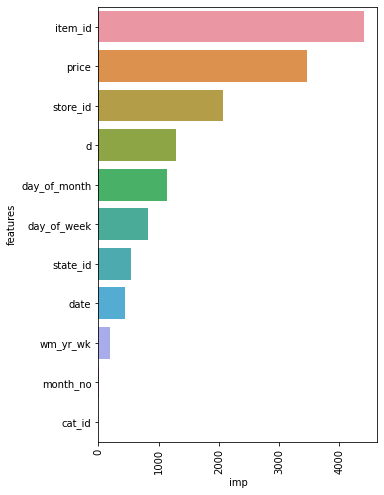

CPU times: user 2min 8s, sys: 425 ms, total: 2min 8s
Wall time: 22.2 s


In [63]:
%%time
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.2,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.03,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 50,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

In [ ]:
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.2,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 50,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)

## Tuning on 5 mon, 1yr, 2y, 3y data

In [21]:
## Tuning on 5 mon data

X_train, y_train, X_val, y_val = get_dept_train_val(train, val, 'FOODS_3')
X_train.drop(['id'], axis=1, inplace=True)
X_val.drop(['id'], axis=1, inplace=True)

/tmp/ipykernel_1889/2258559939.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_v.drop(['dept_id'], axis=1, inplace=True)


In [ ]:
# %%time 

# #############################################################################
# model = LGBMRegressor(boosting_type = 'gbdt',       
#                           objective = 'tweedie',
#                           tweedie_variance_power = 1.3,    ##########
#                           metric = 'rmse',
#                           subsample = 0.5,
#                           subsample_freq = 1,
#                           learning_rate = 0.03,
#                           num_leaves = 2000,              ############
# #                           min_data_in_leaf = 4000,        ############
#                           feature_fraction = 0.5,
#                           max_bin = 200,                 ###########
#                           n_estimators = 1500,
#                           boost_from_average = False,
#                           verbose = -1,
#                           n_jobs = -1)


# fit_fun(model, X_train, y_train, X_val, y_val)

# # On 1 mon data
# # Train Errors: RMSE: 1.2624432888986197, R Sq: 0.9109741973763595
# # Val Errors: RMSE: 3.977589068468091, R Sq: 0.12673695667360396

# # On 5 mon data
# # Train Errors: RMSE: 2.0043874341283376, R Sq: 0.8451296893956647
# # Val Errors: RMSE: 3.7053888386118903, R Sq: 0.2421681874365983
# # Wall time: 12min 34s

# # On 1y data
# # Train Errors: RMSE: 2.2329626217663923, R Sq: 0.8346348027560102
# # Val Errors: RMSE: 3.6080439559727933, R Sq: 0.2814634011461734
# # Wall time: 23min 8s

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
Train Errors: RMSE: 3.048682996176043, R Sq: 0.7071187786951261
Val Errors: RMSE: 4.1683525623168824, R Sq: 0.04096569151356311


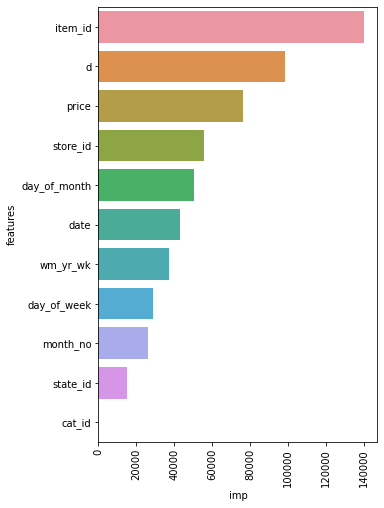

CPU times: user 1h 57min 7s, sys: 11.3 s, total: 1h 57min 19s
Wall time: 19min 57s


In [22]:
%%time  
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 1000,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# On 1 mon data
# Train Errors: RMSE: 2.6514753209629247, R Sq: 0.6072941957515667
# Val Errors: RMSE: 3.943475042961918, R Sq: 0.14165190498191327

# On 5 mon data
# Train Errors: RMSE: 3.0129579754142672, R Sq: 0.6500621050919118
# Val Errors: RMSE: 3.8474216329790862, R Sq: 0.18295717697741842
# Wall time: 2min 45s

# On 1y data
# Train Errors: RMSE: 3.0145914485468377, R Sq: 0.698603550293454
# Val Errors: RMSE: 3.8318804534457422, R Sq: 0.18954453069119226
# Wall time: 7min 58s

# On 2y data
# Train Errors: RMSE: 3.048682996176043, R Sq: 0.7071187786951261
# Val Errors: RMSE: 4.1683525623168824, R Sq: 0.04096569151356311
# Wall time: 19min 57s

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=4000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4000
Train Errors: RMSE: 3.2022375241082046, R Sq: 0.6768723854722978
Val Errors: RMSE: 4.153363957716639, R Sq: 0.047850302012312995


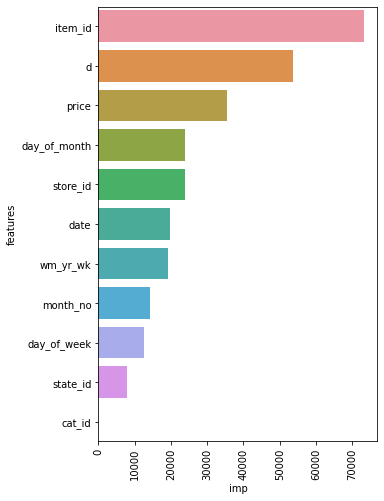

CPU times: user 46min 57s, sys: 6.06 s, total: 47min 3s
Wall time: 8min 1s


In [23]:
%%time 
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 4000,        ############
                          feature_fraction = 0.5,
                          max_bin = 200,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# On 1 mon data
# Train Errors: RMSE: 2.9258395110504996, R Sq: 0.5218180897159042
# Val Errors: RMSE: 3.9505930916559686, R Sq: 0.1385504385895483

# On 5 mon data
# Train Errors: RMSE: 3.225000092471202, R Sq: 0.5990739369563542
# Val Errors: RMSE: 3.796017544324129, R Sq: 0.204643790115693
# Wall time: 1min 21s

# On 1y data
# Train Errors: RMSE: 3.1971161763547364, R Sq: 0.6610012925463016
# Val Errors: RMSE: 3.808296890863292, R Sq: 0.19948983565768508
# Wall time: 3min 36s

# On 2y data
# Train Errors: RMSE: 3.2022375241082046, R Sq: 0.6768723854722978
# Val Errors: RMSE: 4.153363957716639, R Sq: 0.047850302012312995
# Wall time: 8min 1s

### Best Model

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
Train Errors: RMSE: 3.216006285410222, R Sq: 0.6740876876742539
Val Errors: RMSE: 4.064147988300884, R Sq: 0.08831610821400382


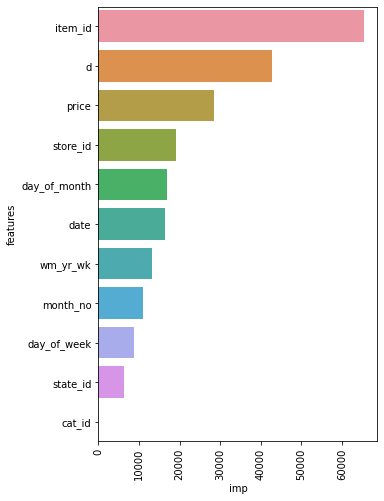

CPU times: user 46min 11s, sys: 5.79 s, total: 46min 17s
Wall time: 7min 53s


In [24]:
%%time 
model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 300,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)


fit_fun(model, X_train, y_train, X_val, y_val)

# On 1 mon data
# Train Errors: RMSE: 2.952813009176483, R Sq: 0.5129606704016394
# Val Errors: RMSE: 3.9612597684654456, R Sq: 0.13389229799192293

# On 5 mon data
# Train Errors: RMSE: 3.2536814991038363, R Sq: 0.5919109871238033
# Val Errors: RMSE: 3.80517456341012, R Sq: 0.20080193411743108
# Wall time: 1min 18s

# On 1y data
# Train Errors: RMSE: 3.2342615037660436, R Sq: 0.6530782970081077
# Val Errors: RMSE: 3.7412703500383633, R Sq: 0.2274200403365345
# Wall time: 3min 49s

# On 2y data
# Train Errors: RMSE: 3.216006285410222, R Sq: 0.6740876876742539
# Val Errors: RMSE: 4.064147988300884, R Sq: 0.08831610821400382
# Wall time: 7min 53s

## Best Models

In [52]:
best_model = LGBMRegressor(boosting_type = 'gbdt',       
                          objective = 'tweedie',
                          tweedie_variance_power = 1.3,    ##########
                          metric = 'rmse',
                          subsample = 0.5,
                          subsample_freq = 1,
                          learning_rate = 0.05,
                          num_leaves = 3000,              ############
                          min_data_in_leaf = 5000,        ############
                          feature_fraction = 0.5,
                          max_bin = 300,                 ###########
                          n_estimators = 500,
                          boost_from_average = False,
                          verbose = -1,
                          n_jobs = -1)